In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define constants
a = 0.2
L = 1.0
N = 201
dx = L / (N - 1)
dt = 0.5 * dx / a
x = np.linspace(0, L, N)
T = 2.5


In [3]:
# Define initial condition
def u0(x):
    return np.sin(2 * np.pi * x)

# Implement Lax-Wendroff discretization scheme
def lax_wendroff_update(u, a, dt, dx):
    u_new = np.zeros_like(u)
    C = a * dt / dx
    for i in range(1, N - 1):
        u_new[i] = u[i] - 0.5 * C * (u[i + 1] - u[i - 1]) + 0.5 * C**2 * (u[i + 1] - 2 * u[i] + u[i - 1])
    # Apply periodic boundary conditions
    u_new[0] = u_new[-2]
    u_new[-1] = u_new[1]
    return u_new


Wave energy (initial) with Lax-Wendroff: 1.2275e-06
Wave energy (final) with Lax-Wendroff: 1.254e-06
Wave Energy Percentage Change with Lax-Wendroff: 2.16 %


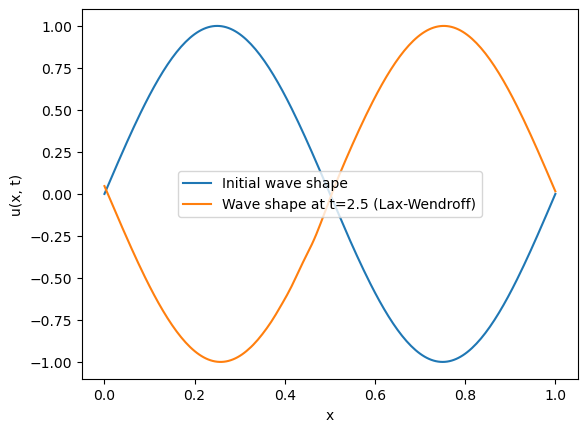

In [4]:
# Solve the wave equation using Lax-Wendroff method
u_lax_wendroff = u0(x)
for t in np.arange(0, T, dt):
    u_lax_wendroff = lax_wendroff_update(u_lax_wendroff, a, dt, dx)

# Define wave energy function
def wave_energy(u, dx):
    return np.sum(0.5 * (u[1:] - u[:-1])**2) * dx

# Calculate wave energy
E_initial_lax_wendroff = wave_energy(u0(x), dx) / N
E_final_lax_wendroff = wave_energy(u_lax_wendroff, dx) / N

print("Wave energy (initial) with Lax-Wendroff:", round((E_initial_lax_wendroff), 10))
print("Wave energy (final) with Lax-Wendroff:", round((E_final_lax_wendroff), 10))
print("Wave Energy Percentage Change with Lax-Wendroff:", round(((E_final_lax_wendroff - E_initial_lax_wendroff) / E_initial_lax_wendroff * 100), 2), "%")

# Plot the solution using Lax-Wendroff method
plt.plot(x, u0(x), label="Initial wave shape")
plt.plot(x, u_lax_wendroff, label="Wave shape at t=2.5 (Lax-Wendroff)")
plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.legend()
plt.show()
